In [1]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import preprocesing as pre
from configparser import ConfigParser
from helpers import plot_MinMaxAvg

In [2]:
from helpers import show_classes_distribution

# Creating dataset

* Zrodlo danych: Sentinel
* Konwerscja JP2 do PNG: ręcznie / skrypt w bash
* Klasyfikacja terenu na podstawie Open Street Map: natural water, landuse forest, landuse farmland
* Ręczna poprawa klasyfikacji

Reading project variable from config.ini file

In [3]:
config = ConfigParser()
config.read('config.ini')
input_dir = config['main']['input_dir']
class_file = config['main']['classification_data']
x_size = int(config['main']['x_size'])
y_size = int(config['main']['y_size'])
x = int(config['main']['x_start'])
y = int(config['main']['x_start'])
class_names = list(config['classes'].values())
csv_data_file = config['main']['csv_data_file']

Read files from data folder

In [4]:
data, columns_names = pre.images_to_numpy(input_dir, x_size, y_size, x, y)

diles:  ['T34UDE_20200815T095039_B11_20m.png', 'T34UDE_20200815T095039_B05_20m.png', 'T34UDE_20200815T095039_B8A_20m.png', 'T34UDE_20200815T095039_B03_20m.png', 'T34UDE_20200815T095039_B07_20m.png', 'T34UDE_20200815T095039_B06_20m.png', 'T34UDE_20200815T095039_B04_20m.png', 'T34UDE_20200815T095039_B02_20m.png', 'T34UDE_20200815T095039_B12_20m.png']


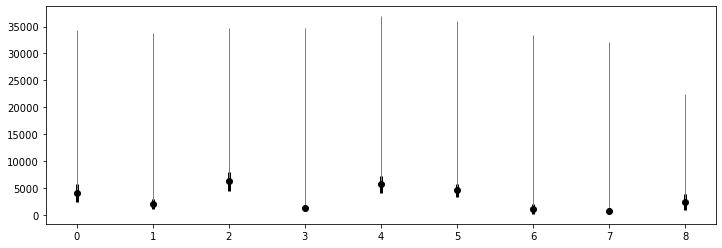

In [5]:
plot_MinMaxAvg(data)

the data has a large variance so we have to deal with outstanding data $ x = min(x,\overline{x}+3\sigma_{x}) $ and implement minimax scaller from sklearn. 
* Normalisation should be done on training and test separetly but the project is just for learning purpose

In [6]:
 data = pre.remove_outstandings(data)

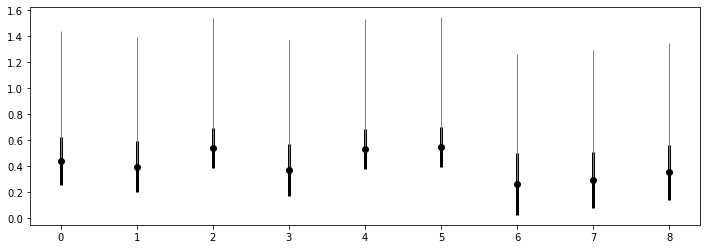

In [7]:
plot_MinMaxAvg(data)

Read classes from directory

In [8]:
classes = pre.get_classes(class_file,  x_size, y_size, x, y).astype(int)
other = (1 - classes.any(axis=1).astype(int)).reshape(-1,1)
columns_names += class_names 

diles:  ['forests_20m.png', 'water_20m.png', 'farmland_20m.png']


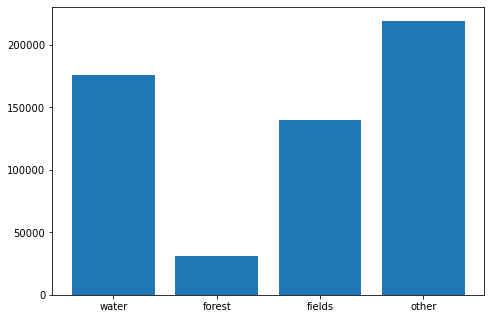

In [9]:
show_classes_distribution(np.concatenate((classes, other), axis=1),class_names)

Saving data to csv file

In [10]:
data = np.concatenate((data, classes, other), axis=1)
data = pd.DataFrame(data, columns=columns_names)
data.to_csv(csv_data_file)